In [1]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("HeartDisease.csv")

In [2]:
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

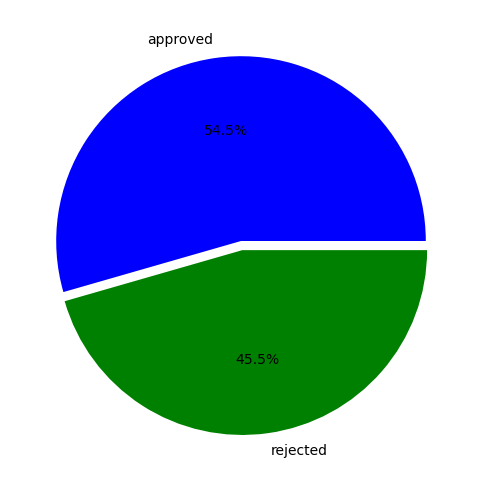

In [6]:
plt.figure(figsize=(11,6))

labels=["approved",'rejected']
explode=[.0,.05]
mycolors=['Blue','Green']
sizes=data['target'].value_counts().values
plt.pie(sizes,explode=explode,labels=labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

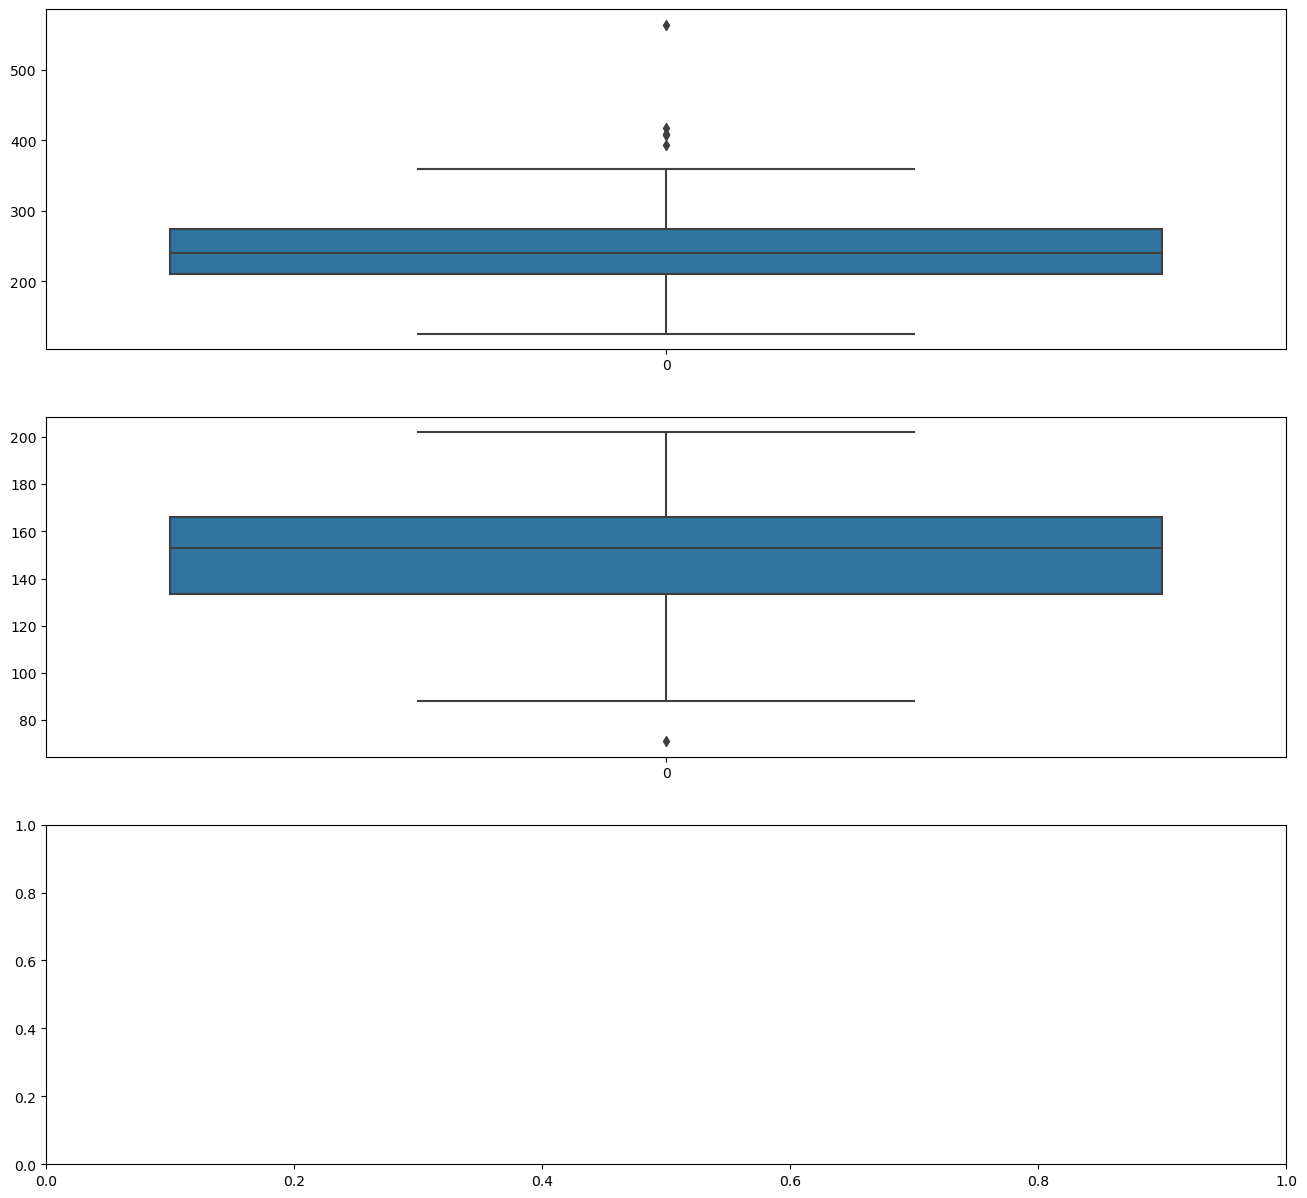

In [13]:
fig,axs=plt.subplots(3,1,figsize=(16,15))
plt1=sns.boxplot(data['cholestrol'],ax=axs[0])
plt1=sns.boxplot(data['thalach'],ax=axs[1])
plt.show()

In [15]:
from sklearn.feature_selection import chi2

In [16]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [17]:
x1=data[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia']]
y1=data['target']

In [18]:
score=chi2(x1,y1)
score

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

In [19]:
p_values=pd.Series(score[1],index=x1.columns)

In [20]:
p_values

age                    1.395673e-06
gender                 5.912318e-03
chest_pain             2.534982e-15
rest_bps               1.180286e-04
cholestrol             9.957148e-07
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
thalach                7.395102e-43
exer_angina            4.428074e-10
old_peak               1.552583e-17
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

In [21]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,": reject the null hypothesis")
    else:
        print(x,": accept the null hypothesis")
        irr_cols.append(x)

age : reject the null hypothesis
gender : reject the null hypothesis
chest_pain : reject the null hypothesis
rest_bps : reject the null hypothesis
cholestrol : reject the null hypothesis
fasting_blood_sugar : accept the null hypothesis
rest_ecg : accept the null hypothesis
thalach : reject the null hypothesis
exer_angina : reject the null hypothesis
old_peak : reject the null hypothesis
slope : reject the null hypothesis
ca : reject the null hypothesis
thalassemia : reject the null hypothesis


In [22]:
irr_cols

['fasting_blood_sugar', 'rest_ecg']

In [23]:
data.drop(labels=irr_cols,axis=1,inplace=True)

In [24]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [26]:
X=data.drop('target',axis=1)
y=data['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=32)

In [31]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier()


In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
pred=dt.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,classification_report,confusion_matrix

In [48]:
print("accuracy score: ",accuracy_score(y_test,pred))

accuracy score:  0.7540983606557377


In [49]:
print("f1 score: ",f1_score(y_test,pred))

f1 score:  0.7619047619047619


In [50]:
print("AUC score: ",roc_auc_score(y_test,pred))

AUC score:  0.7537634408602152


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        30
           1       0.75      0.77      0.76        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



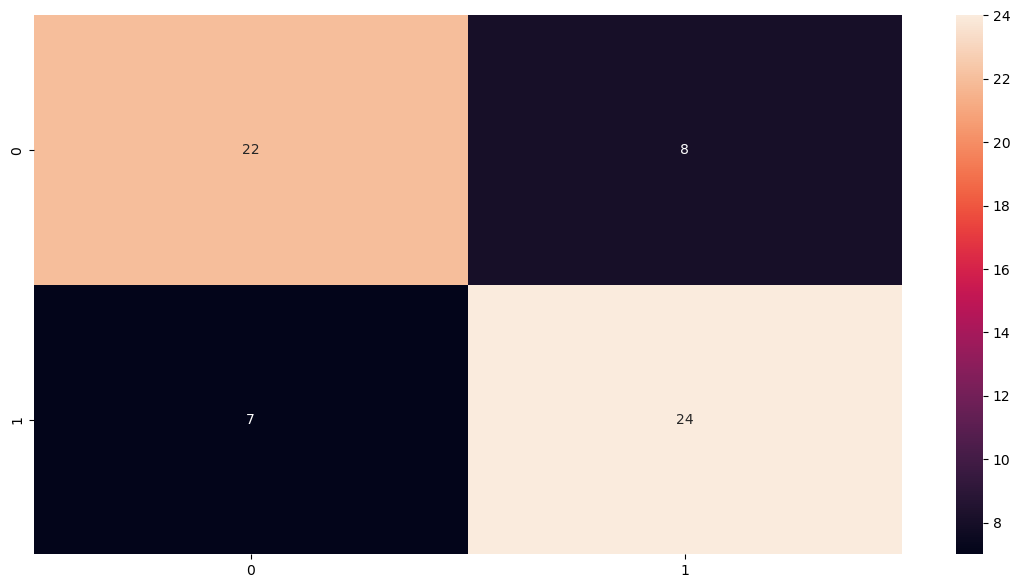

In [46]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.show()

# tunning manual

In [40]:
dt_tune=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=35)

In [41]:
dt_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [42]:
pred_t=dt_tune.predict(X_test)

In [43]:
print(classification_report(y_test,pred_t))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



In [44]:
print("AUC score: ",roc_auc_score(y_test,pred_t))

AUC score:  0.8010752688172044


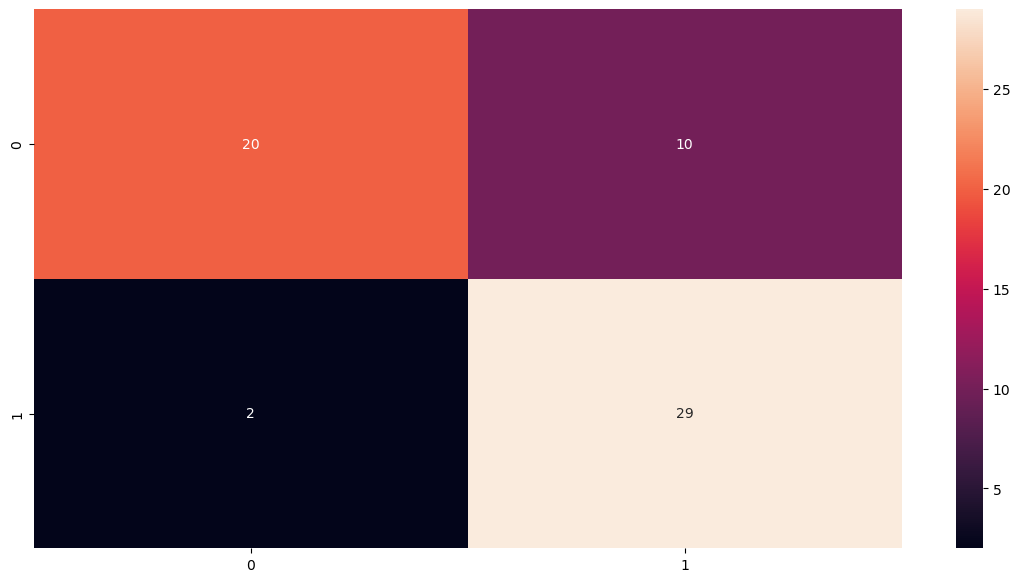

In [45]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test,pred_t),annot=True)
plt.show()